In [55]:
# question-1
import pandas as pd
import numpy as np
df=pd.read_csv("sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [57]:
# mean of all nuerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns  # to find the numerical columns
mean=df[numerical_columns].mean() # finding the mean of all numerical columns
print("(mean):\n",mean)
# median of all numerical columns
median=df[numerical_columns].median() # finding the median of all numerical columns
print("\n(median):\n",median)
#standard deviation of all numerical columns
std=df[numerical_columns].std() # finding the median of all numerical columns
print("\n(std_deviation):\n",std)
mode=df[numerical_columns].mode().iloc[0] # finding th mode of all numerical columns , iloc[0] is used to display only the mode value instead the entire dataframe
print("\n(mode):\n",mode)




(mean):
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

(median):
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

(std_deviation):
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

(mode):
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64


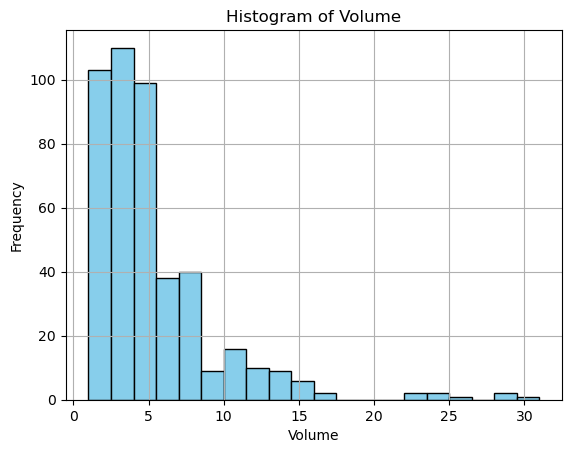

Skewness: 2.72
positively skewed


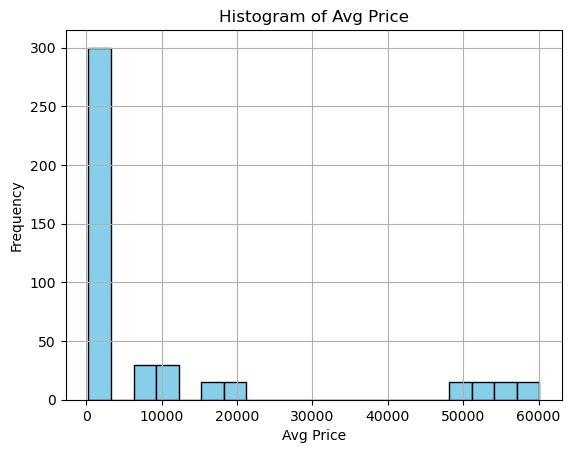

Skewness: 1.90
positively skewed


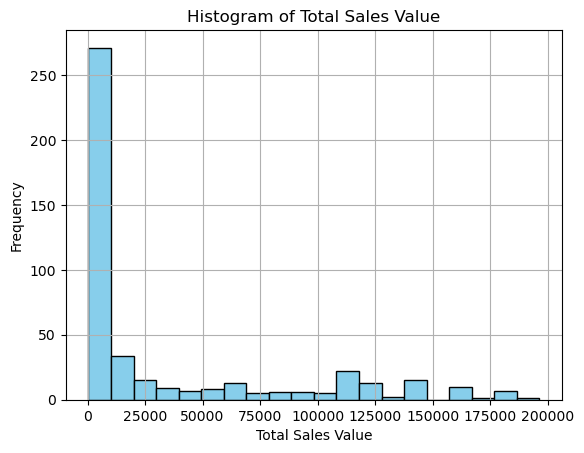

Skewness: 1.53
positively skewed


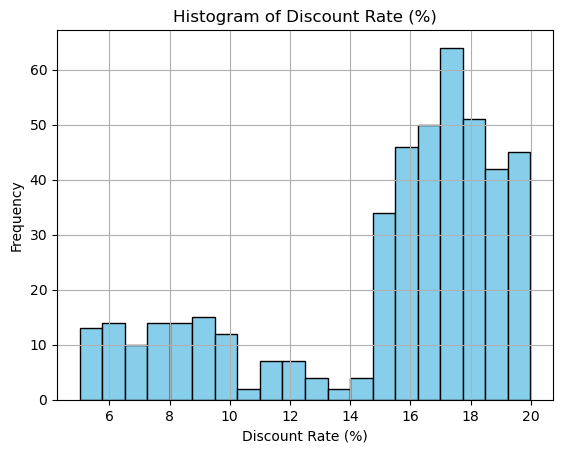

Skewness: -1.06
negatively skewed


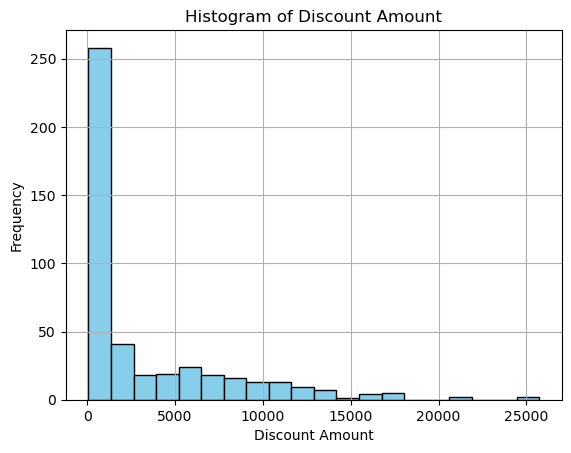

Skewness: 1.91
positively skewed


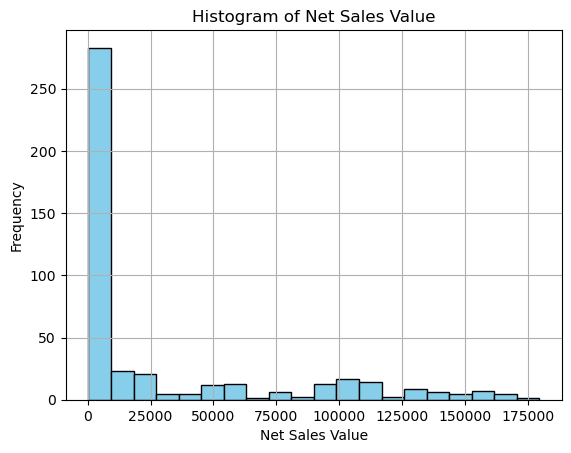

Skewness: 1.54
positively skewed


In [59]:
# auestion-2
# histogram of numerical column
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms for each numerical column
for col in numerical_cols:
    col_skewness = skew(df[col]) #calculating skewness of each histogram
    
    df[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness: {col_skewness:.2f}") # printing skewness
    # deterining the skewness(=ve or -ve)
    if col_skewness > 1:
        print("positively skewed")
    else:
        print("negatively skewed")
    


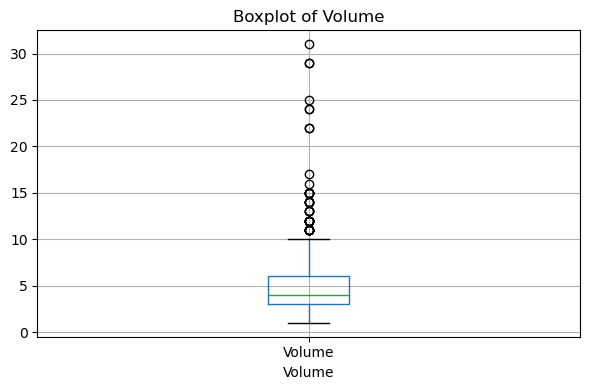

Outliers detected: 44
Lower extreme: -1.5
Upper extreme: 10.5


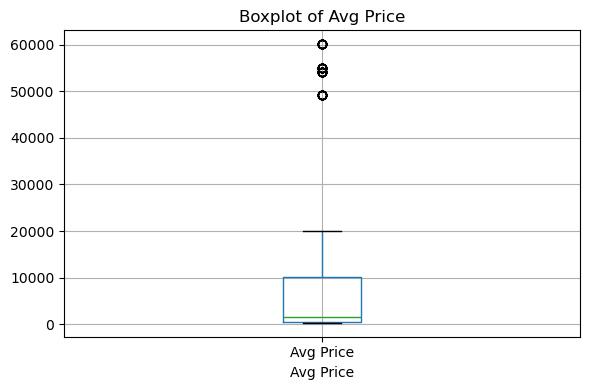

Outliers detected: 60
Lower extreme: -13987.5
Upper extreme: 24552.5


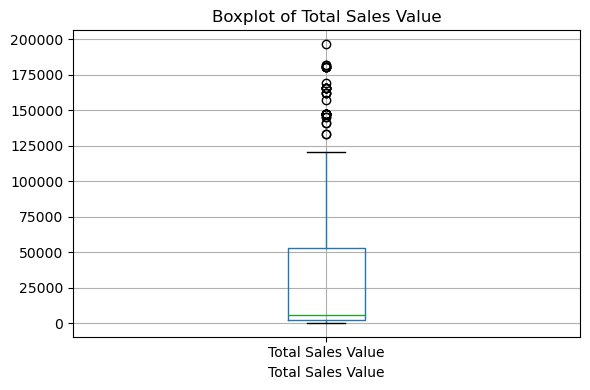

Outliers detected: 36
Lower extreme: -73050.0
Upper extreme: 128950.0


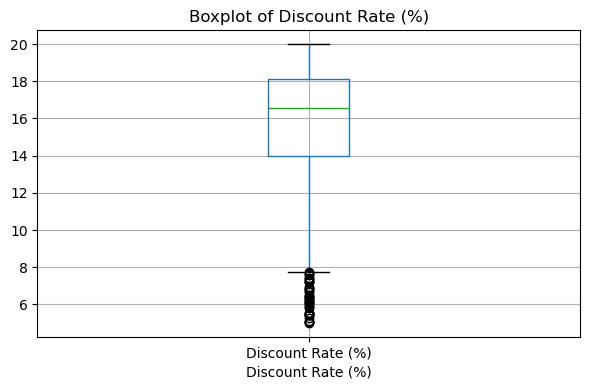

Outliers detected: 45
Lower extreme: 7.740578642625298
Upper extreme: 24.339202378829146


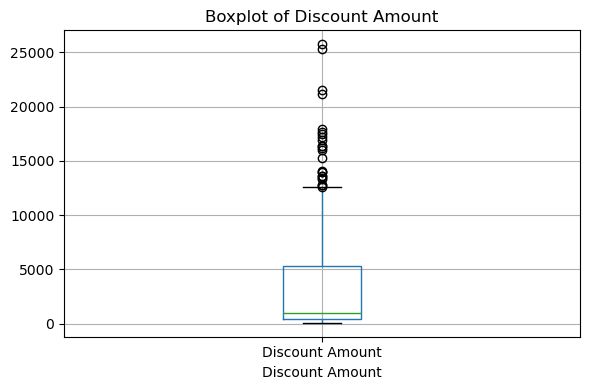

Outliers detected: 24
Lower extreme: -6823.594880316146
Upper extreme: 12600.54961088833


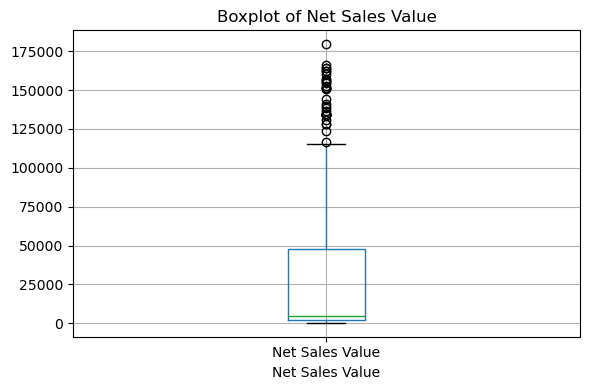

Outliers detected: 35
Lower extreme: -66266.347664084
Upper extreme: 116316.46916099661


In [61]:
# Boxplots for all numerical columns
import pandas as pd
import matplotlib.pyplot as plt

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Plotting boxplots for each numerical column
for col in numerical_cols:
    series = df[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

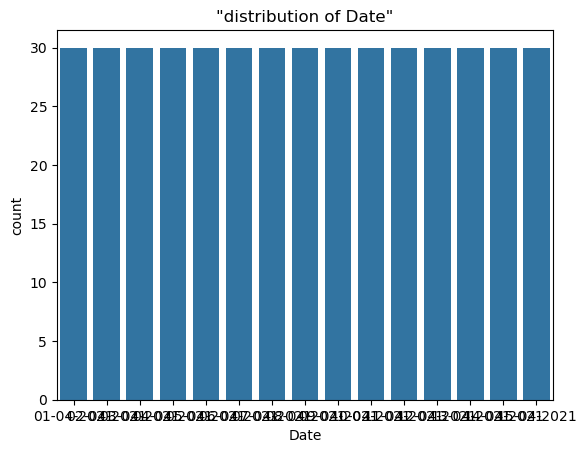

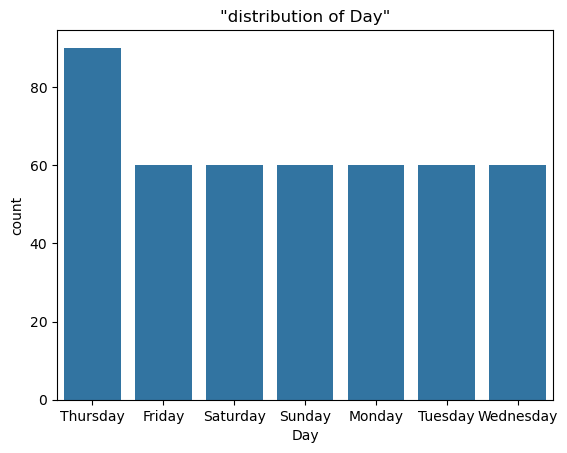

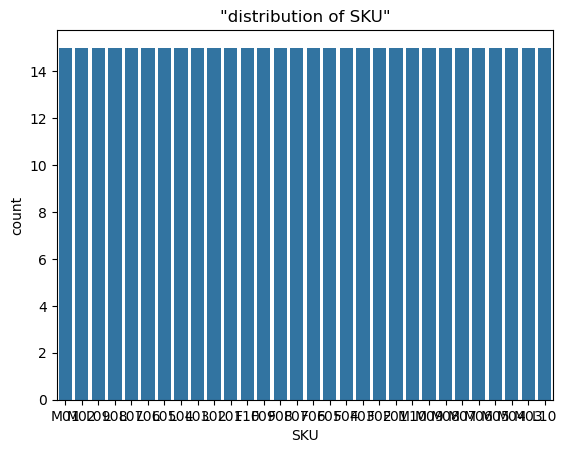

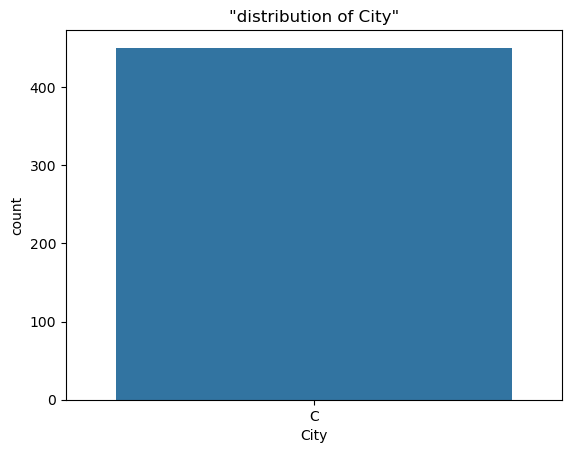

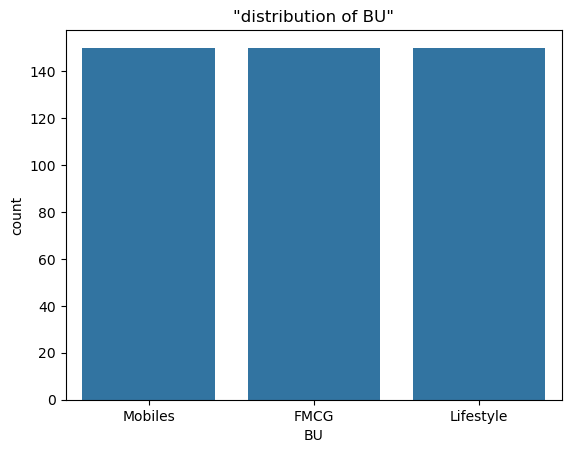

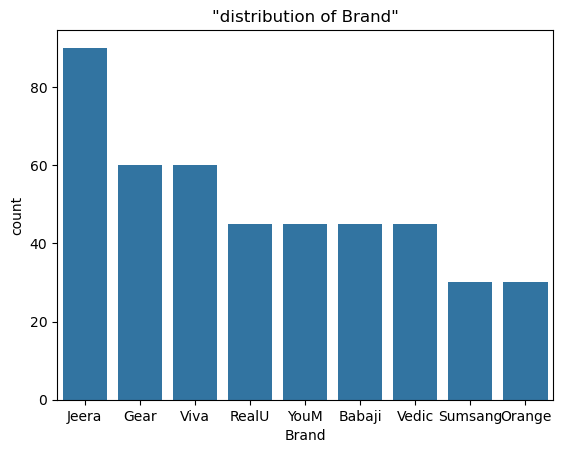

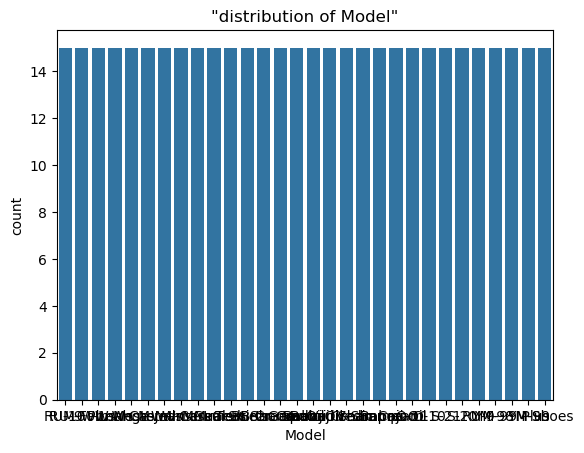

In [62]:
# bar charts for categorical columns
import matplotlib.pyplot as plt
import seaborn as sns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns # to select only categorical columns
# Plotting bar charts for each categorical column
for col in categorical_columns:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)  # countplot gives the count of category in each categorical column
    plt.title(f'"distribution of {col}"')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()



<Figure size 1200x500 with 0 Axes>

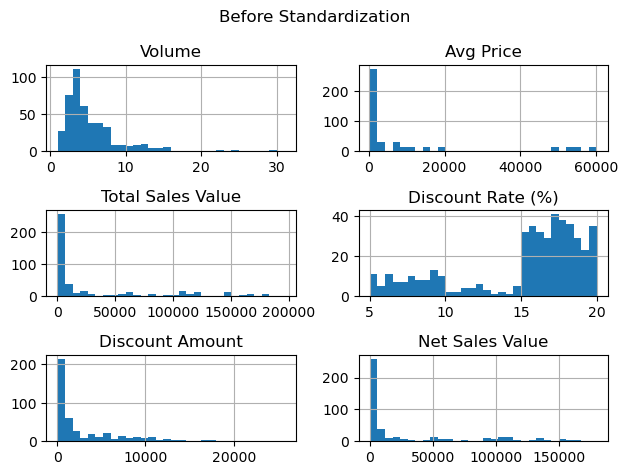

<Figure size 1200x500 with 0 Axes>

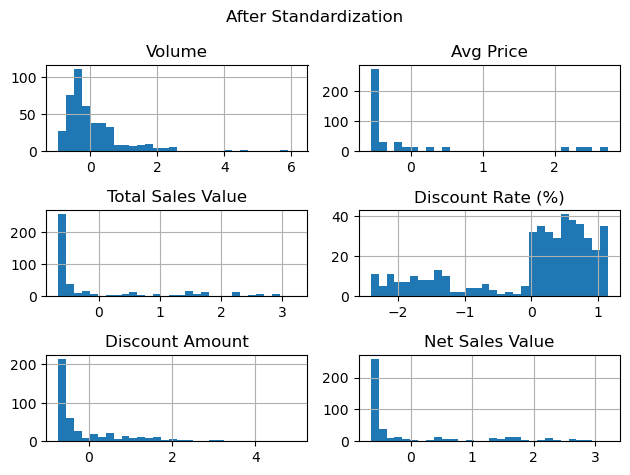

In [64]:
# Question-3:Standardization of Numerical Variables
# z-standardization is a scaling technique where the values are centered around the mean with a unit of std_deviation 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv("salesdata.csv")

# Selecting only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Visualizing before standardization
plt.figure(figsize=(12, 5))
df[numeric_cols].hist(bins=30)
plt.suptitle("Before Standardization")
plt.tight_layout()
plt.show()

# Standardizing the data  
df_standardized = df.copy()
df_standardized[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std() # stadardizing using the forula z=(x-mu)/std

# Visualizing after standardization
plt.figure(figsize=(12, 5))
df_standardized[numeric_cols].hist(bins=30)
plt.suptitle("After Standardization")
plt.tight_layout()    #Labels, titles do not overlap.
plt.show()


In [65]:
# Question-4: Conversion of Categorical Data into Dummy Variables
# Machine learning models work with numbers—not text. So, we have to convert categorical variables  into numerical format using one-hot encoding.
import pandas as pd

# importing the dataset
df = pd.read_csv("salesdata.csv")

# selecting only categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Applying one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols).astype(int)

# displaying the transformed dataset
df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11,21153,160346,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11,11676,89323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9,10657,102042,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6,8364,112235,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17,4372,19927,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
